# Data Scientist Application Exercise

## Franco De Giovannini

### Objectives:
In your role of Data Scientist you will be cycling around the CRISP-DM. Your objective 
with this exercise is to go through the data mining process using the provided dataset 
completing each step to finally communicate your results and work for every stage.
On the last step (deployment) you will need to answer the following 3 questions:
- Pick the best clients you will give a loan to, based on the model you created. It could be as complex as you decide (even as simpler as knock out rules), as long as the metrics support it
- Propose an amount to be lended to those clients and a term in which the loan will need to be paid back.
- Finally choose an anual interest rate the lended amount must have in order to be profitable


Don’t forget to provide justification for you answers.
You are strongly encouraged to use Python, and do NOT use autoML frameworks.
For every step/phase you should include at least the following (Use them as a starting 
point):
- **Business Understanding**: By using the information of the label (column class), What characteristics differentiate between a good client and a bad client?
- **Data Understanding**: Describe the dataset and perform exploratory analysis over the different features/attributes to gather information about the data.
- **Data Preparation**: Perform cleaning, transformation (create new features), normalize and/or perform attribute selection on the data to prepare the dataset for the next step.
- **Modeling**: Choose (and explain why) a classification/regression algorithm and train it using your prepared data.
- **Evaluation**: Describe which metrics you are using to evaluate your model and why you choose them.
- **Deployment**: Communicate your findings by answering the previous three questions providing sensible justification for each one.

----------

### Appendix
- **users.csv codebook**:
  - _id_: User’s unique identifier.
  - _monthly_income_: User’s monthly declared income.
  - _monthly_outcome_: User’s monthly declared outcome.
  - _class_: Boolean value 1 if the client was good or 0 if bad.
- **credit_reports.csv codebook**:
  - _user_id_: User’s unique identifier.
  - _institution_: Institution granting the loan.
  - _account_type_: Type of account for the institution.
  - _credit_type_: Type of loan granted by the institution.
  - _total_credit_payments_: Length of the credit (in amount of payments).
  - _payment_frequency_: Frequency of the payments.
  - _amount_to_pay_next_payment_: Amount to be paid on the next loan payment.
  - _account_opening_date_: Date the account was opened.
  - _account_closing_date_: Date the account was closed.
  - _maximum_credit_amount_: maximum amount of credit used by the consumer.
  - _current_balance_: Current balance needed to pay off the loan.
  - _credit_limit_: Credit limit for this account.
  - _past_due_balance_: Balance that is delinquent.
  - _number_of_payments_due_: Number of payments that are delinquent.
  - _worst_delinquency_: Worst delinquency (in payments) during the loan’s life.
  - _worst_delinquency_date_: Worst delinquency date.
  - _worst_delinquency_past_due_balance_: Worst accumulated delinquent balance.

-------------
# Solution

### Importing libraries, classes and functions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the datasets

In [2]:
users = pd.read_csv('users.csv', index_col='id')
credits = pd.read_csv('credit_reports.csv')
display(users.head(3))
display(credits.loc[credits['user_id']==0, :])

,monthly_income,monthly_outcome,class
id,,,
0,255359,151439,1
1,8940,789,0
2,11436,3316,0


,user_id,institution,account_type,credit_type,total_credit_payments,payment_frequency,amount_to_pay_next_payment,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_date,worst_delinquency_past_due_balance
0,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,78.0,Semanal,0.0,11/10/14,12/5/15,9826.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,80.0,Semanal,0.0,12/5/15,10/14/16,16000.0,0.0,0.0,0.0,3.0,1.0,5/28/16,200.0
2,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Línea de Crédito,102.0,Semanal,100.0,9/2/16,NaN,10205.0,3505.0,0.0,0.0,3.0,1.0,3/3/17,100.0
3,0,MERCANCIA PARA HOGAR Y OFICINA,Pagos Fijos,Préstamo Personal,120.0,Semanal,191.0,10/14/16,NaN,22920.0,11269.0,0.0,0.0,3.0,1.0,3/3/17,191.0
4,0,KONFIO,Pagos Fijos,Préstamo Personal,12.0,Quincenal,0.0,12/27/16,6/27/17,150000.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
5,0,KONFIO,Pagos Fijos,Préstamo Personal,26.0,Quincenal,10825.0,6/28/17,NaN,225000.0,159142.0,0.0,0.0,0.0,0.0,NaN,0.0
6,0,TELEFONIA CELULAR,Revolvente,Línea de Crédito,1000.0,Mensual,0.0,10/6/16,9/15/17,0.0,0.0,999.0,0.0,7.0,4.0,5/31/17,4342.0
7,0,MERCANCIA PARA HOGAR Y OFICINA,Sin Límite Preestablecido,Crédito Personal al Consumo,0.0,Semanal,0.0,11/10/14,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
8,0,AUTOMOTRIZ,Pagos Fijos,Compra de Automóvil,72.0,Mensual,5874.0,8/22/17,NaN,513069.0,475245.0,513069.0,0.0,0.0,0.0,NaN,0.0
9,0,AUTOMOTRIZ,Pagos Fijos,Compra de Automóvil,24.0,Mensual,10557.0,1/31/17,NaN,247705.0,124316.0,247705.0,0.0,0.0,0.0,NaN,0.0


## 1. Business Understanding
We begin by trying to visualize differences between the populations of good vs bad users.

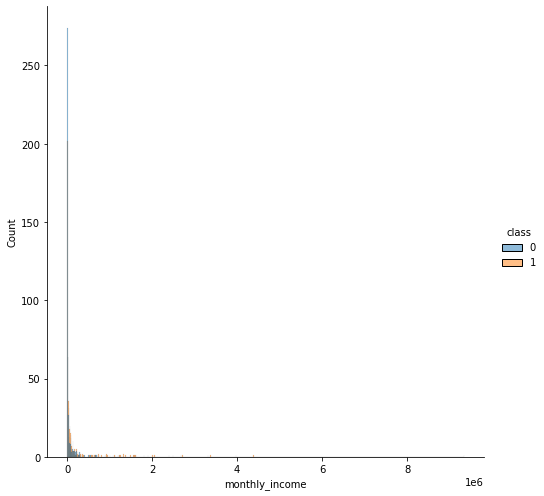

In [3]:
sns.displot(users, x='monthly_income', hue='class', height=7);

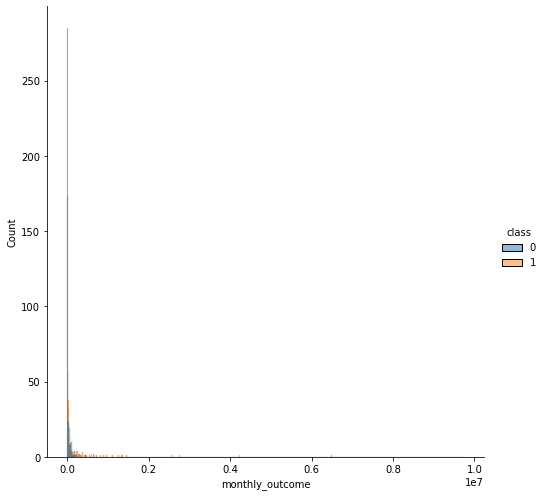

In [4]:
sns.displot(users, x='monthly_outcome', hue='class', height=7);

Even though in this section we shouldn't try to transform the data, since we have income and expenditure data, and such information tend to be rather asymetric, we'll analyse the distributions in `ln` scale.

In [5]:
users['ln_income'] = np.log(users['monthly_income'])
users['ln_outcome'] = np.log(users['monthly_outcome'])

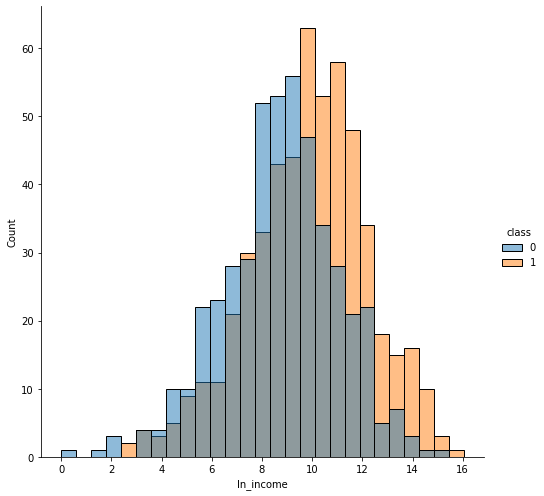

In [6]:
sns.displot(users, x='ln_income', hue='class', height=7);

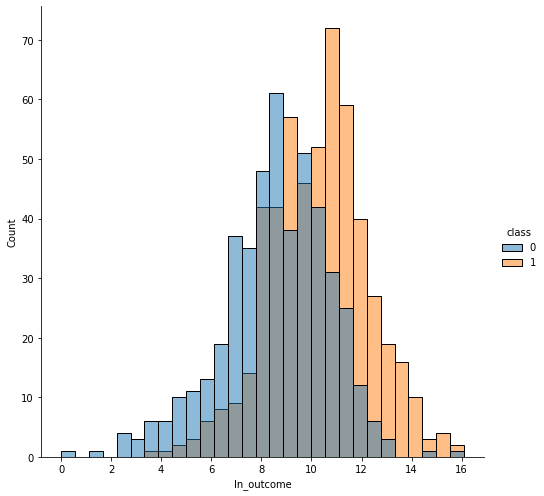

In [7]:
sns.displot(users, x='ln_outcome', hue='class', height=7);

In [55]:
users[['ln_income', 'ln_outcome']].describe().loc['mean':'max', :].apply(lambda x: round(np.exp(x)))

,ln_income,ln_outcome
mean,11339.0,12975.0
std,11.0,9.0
min,1.0,1.0
25%,2691.0,3398.0
50%,12533.0,14242.0
75%,58684.0,57228.0
max,9344842.0,9749651.0


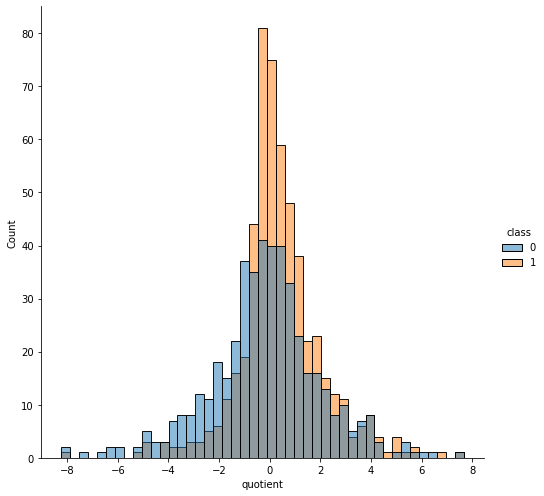

In [57]:
users['quotient'] = users['ln_outcome'] - users['ln_income']

sns.displot(users, x='quotient', hue='class', height=7);

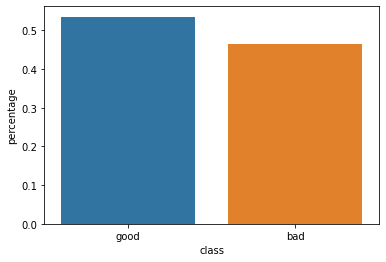

In [11]:
data = users['class'].value_counts(normalize=True).reset_index()
data['index'] = ['good', 'bad']
data.columns = ['class', 'percentage']
g = sns.barplot(x='class', y='percentage', data=data);

#### Credits
We merge the data with the credits to find out characteristics about the good and bad borrowers.

In [12]:
credits = credits.reset_index()
credits = credits.rename({'index':'credit_id'}, axis=1)
df = users.reset_index().merge(credits, left_on='id', right_on='user_id', how='left')

In [13]:
df = df.drop(columns=['id'])
df.head(3)

,monthly_income,monthly_outcome,class,ln_income,ln_outcome,balance,quotient,credit_id,user_id,institution,...,account_opening_date,account_closing_date,maximum_credit_amount,current_balance,credit_limit,past_due_balance,number_of_payments_due,worst_delinquency,worst_delinquency_date,worst_delinquency_past_due_balance
0,255359,151439,1,12.450426,11.927938,103920,-0.522487,0,0,MERCANCIA PARA HOGAR Y OFICINA,...,11/10/14,12/5/15,9826.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
1,255359,151439,1,12.450426,11.927938,103920,-0.522487,1,0,MERCANCIA PARA HOGAR Y OFICINA,...,12/5/15,10/14/16,16000.0,0.0,0.0,0.0,3.0,1.0,5/28/16,200.0
2,255359,151439,1,12.450426,11.927938,103920,-0.522487,2,0,MERCANCIA PARA HOGAR Y OFICINA,...,9/2/16,NaN,10205.0,3505.0,0.0,0.0,3.0,1.0,3/3/17,100.0


#### Aggregating data

In [83]:
vars_ = ['monthly_income', 'monthly_outcome', 'ln_income',
         'ln_outcome', 'quotient', 'amount_to_pay_next_payment',
         'number_of_payments_due', 'worst_delinquency', 'total_credit_payments', 'current_balance']

gb = df.groupby('user_id')[vars_].mean().reset_index()

In [84]:
gb = gb.merge(users.reset_index()[['id', 'class']], left_on='user_id', right_on='id')

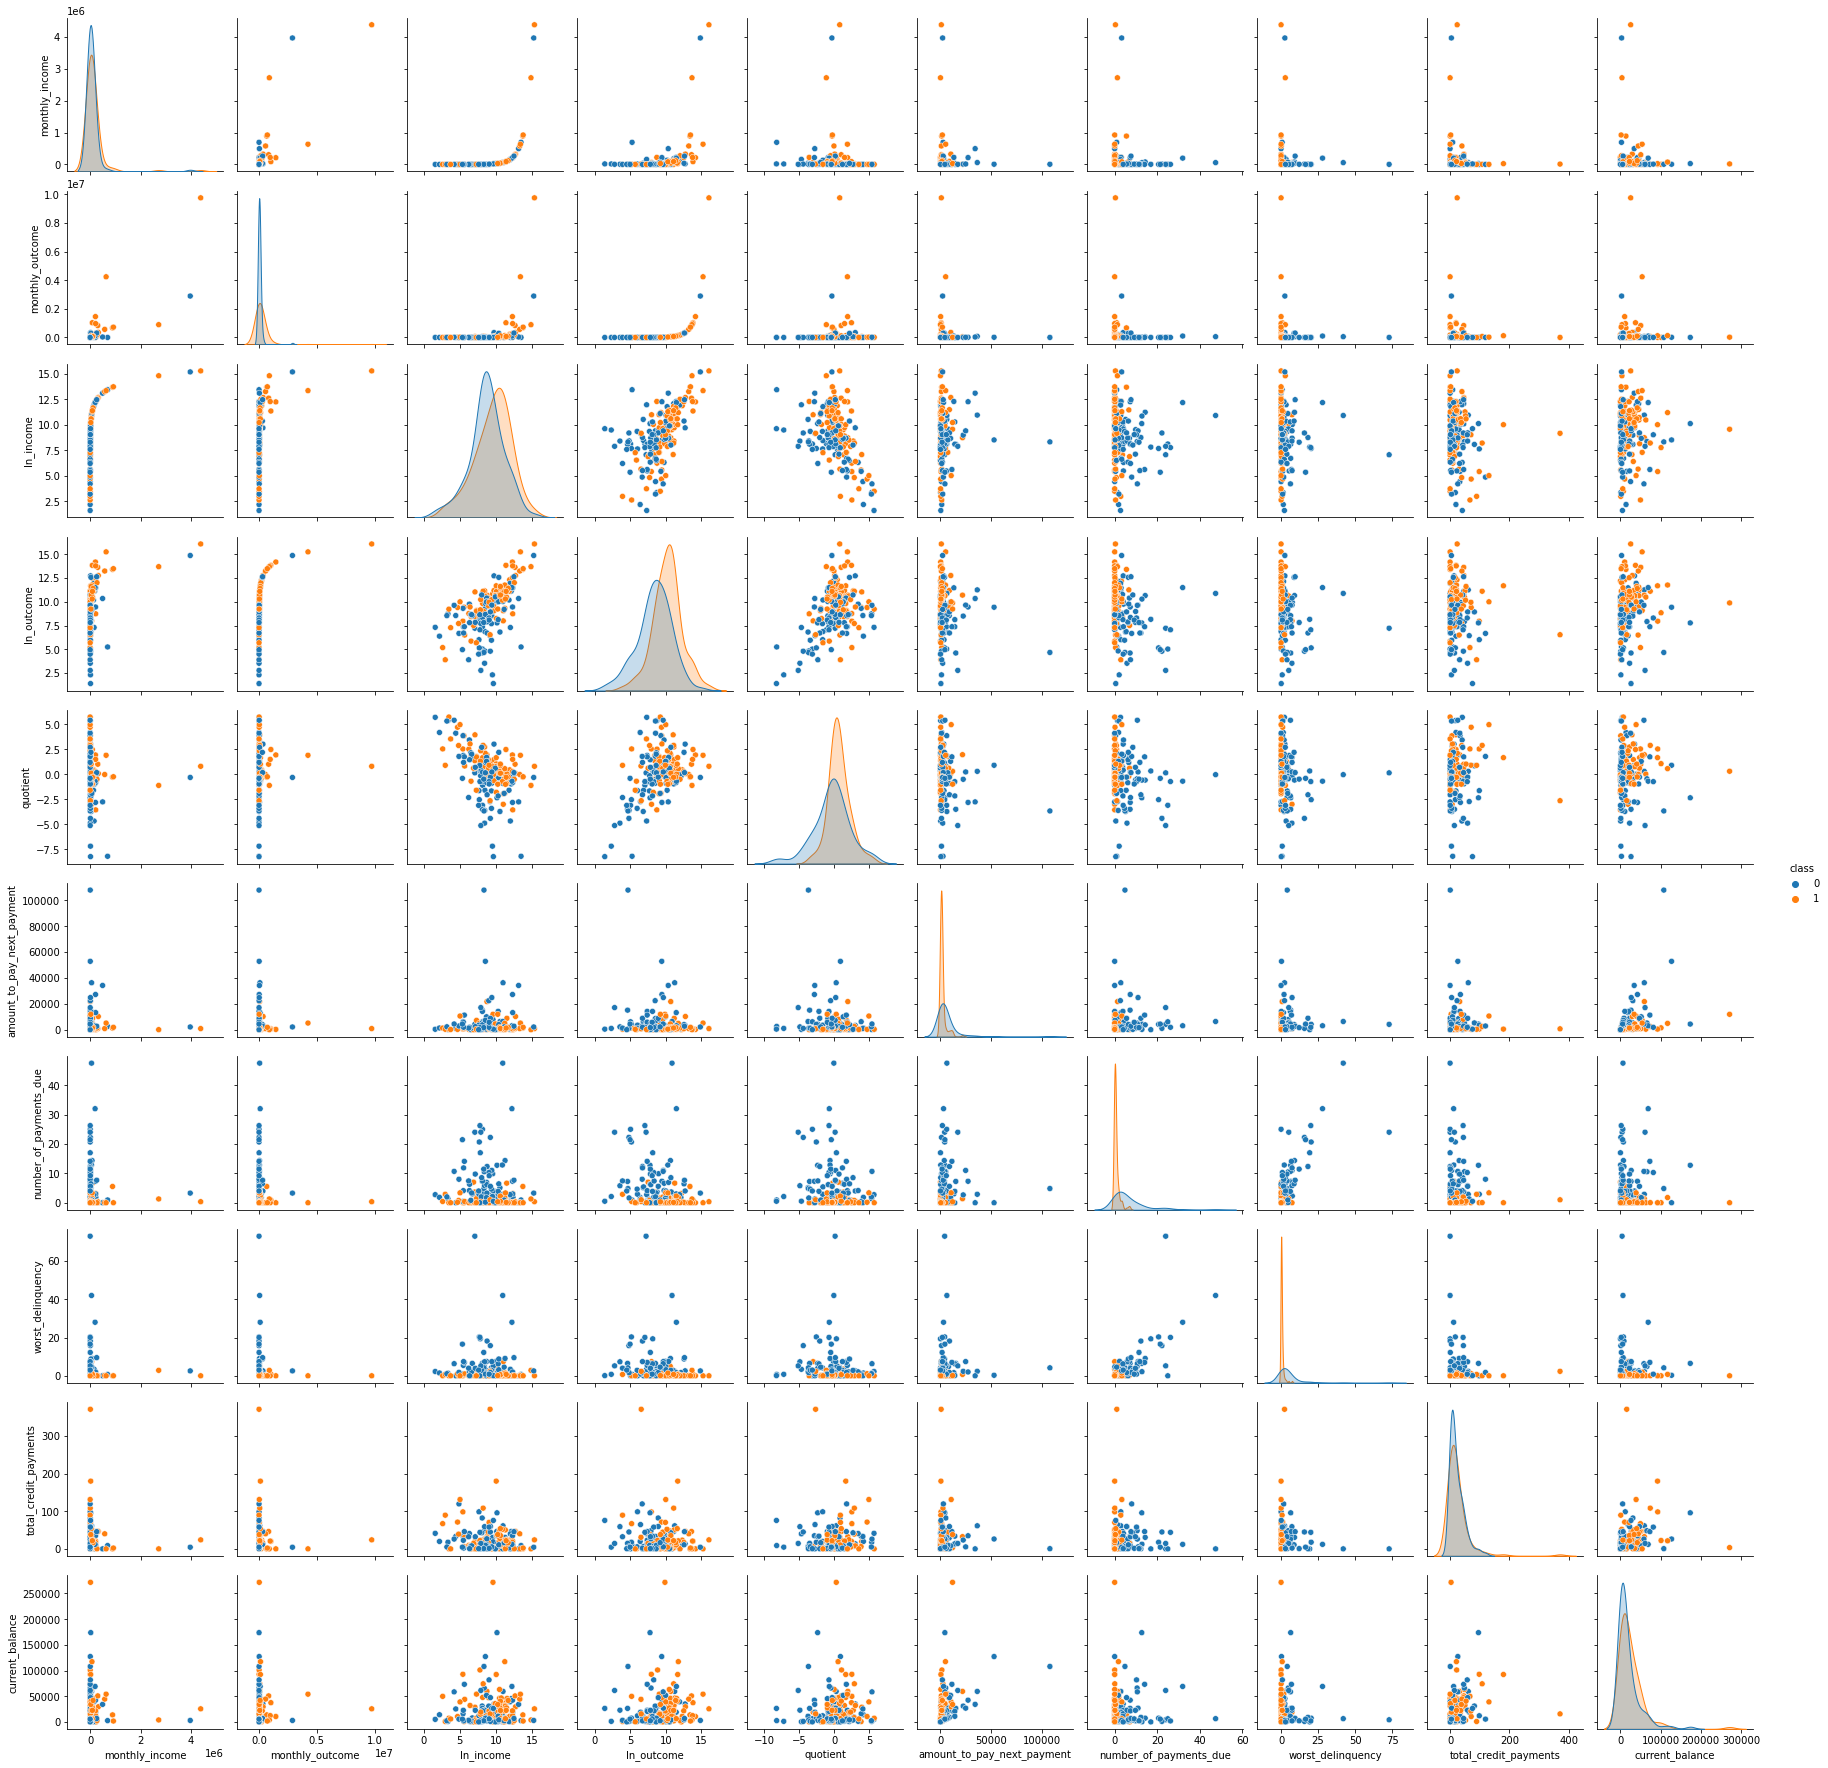

In [85]:
sns.pairplot(gb.drop(columns=['id', 'user_id']).sample(200), hue='class')

### Thoughts
This type of datasets usually are quite unbalanced, with 5% or less of defaulted borrowers. The class blance found here suggests intervention.

Regarding the understanding of the problem, in order to be able to find insighful information between creditors, a bit of data wrangling is required, aggregating information on recent credits, parsing dates in order to filter and sort the information, etc.

## 4. Data Understanding
### Categorical variables
We take a look about the different sources of loans that users get.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16309 entries, 0 to 16308
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   monthly_income                      16309 non-null  int64  
 1   monthly_outcome                     16309 non-null  int64  
 2   class                               16309 non-null  int64  
 3   ln_income                           16309 non-null  float64
 4   ln_outcome                          16309 non-null  float64
 5   balance                             16309 non-null  int64  
 6   quotient                            16309 non-null  float64
 7   credit_id                           16309 non-null  int64  
 8   user_id                             16309 non-null  int64  
 9   institution                         16309 non-null  object 
 10  account_type                        16309 non-null  object 
 11  credit_type                         16309

In [92]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

worst_delinquency_date                0.796922
account_closing_date                  0.443988
worst_delinquency                     0.003311
total_credit_payments                 0.002514
credit_limit                          0.000797
number_of_payments_due                0.000736
worst_delinquency_past_due_balance    0.000736
past_due_balance                      0.000307
current_balance                       0.000307
amount_to_pay_next_payment            0.000307
maximum_credit_amount                 0.000123
payment_frequency                     0.000061
quotient                              0.000000
monthly_outcome                       0.000000
class                                 0.000000
ln_income                             0.000000
ln_outcome                            0.000000
balance                               0.000000
overdraft                             0.000000
credit_id                             0.000000
user_id                               0.000000
institution  

Variable `worst_delinquency_date` has too many missing values and will be dropped. Missing 44% of `account_clossing_date` is irrelevant, since many credits and financial products might be currently active.

In [88]:
df.dtypes

monthly_income                          int64
monthly_outcome                         int64
class                                   int64
ln_income                             float64
ln_outcome                            float64
balance                                 int64
quotient                              float64
credit_id                               int64
user_id                                 int64
institution                            object
account_type                           object
credit_type                            object
total_credit_payments                 float64
payment_frequency                      object
amount_to_pay_next_payment            float64
account_opening_date                   object
account_closing_date                   object
maximum_credit_amount                 float64
current_balance                       float64
credit_limit                          float64
past_due_balance                      float64
number_of_payments_due            

In [21]:
display(df['credit_type'].value_counts())
print(df['credit_type'].value_counts().shape)

Préstamo Personal               5717
Línea de Crédito                3729
Tarjeta de Crédito              3441
Aparatos - Muebles               777
Otros (Múltiples Créditos)       514
Compra de Automóvil              435
Préstamo de Nomina              262
Crédito al Consumo               260
Bienes Raíces                    218
Crédito Fiscal                   207
Crédito Personal al Consumo      176
Grupo Solidario                  162
Arrendamiento Automotriz         103
Arrendamiento                     75
Hipotecario O Vivienda            58
Préstamo Garantizado              54
Física Actividad Empresarial      35
Mejoras a la Casa                 26
Desconocido                       23
Préstamo para estudiante          10
Préstamo Quirografiario            9
Préstamo no garantizado            7
Préstamo Empresarial               4
Factoraje                          4
Tarjeta Departamental              2
Banca Comunal                      1
Name: credit_type, dtype: int64

(26,)


In [22]:
display(df['payment_frequency'].value_counts())
print(df['payment_frequency'].value_counts().shape)

Mensual                                 11191
Semanal                                  2731
Quincenal                                1003
Una sola exhibición                       875
Catorcenal                                294
Pago mínimo para cuentas revolventes       98
Anual                                      76
Bimestral                                  30
Trimestral                                  9
Deducción del salario                       1
Name: payment_frequency, dtype: int64

(10,)


In [23]:
display(df['account_type'].value_counts())
print(df['account_type'].value_counts().shape)

Pagos Fijos                        8083
Revolvente                         4652
Sin Límite Preestablecido          2732
Crédito Prendario                   526
Hipoteca                            273
Quirografiario                       36
Crédito de Habilitación de Avío       5
Crédito Refaccionario                 2
Name: account_type, dtype: int64

(8,)


In [24]:
display(df['institution'].value_counts())
print(df['institution'].value_counts().shape)

BANCO                              5023
CONSUMO                            3059
FINANCIERA                         2992
COMUNICACIONES                     2040
SERVICIOS                           788
GOBIERNO                            395
BIENES RAICES                       386
FONDOS Y FIDEICOMISOS               368
AUTOMOTRIZ                          329
CIA Q  OTORGA                       169
COBRANZA                            160
SOFOL PRESTAMO PERSONAL             157
KONFIO                              125
COOPERATIVA                          71
CAJAS DE AHORRO                      66
OTRAS FINANCIERA                     59
COMPANIA DE PRESTAMO PERSONAL        53
COOPERATIVA DE AHORRO Y CREDITO      16
SIC                                  14
EDUCACION                             9
ARRENDAMIENTO                         8
MIC CREDITO PERS                      6
AUTOFINANCIAMIENTO                    6
COMERCIAL                             4
SOFOL EMPRESARIAL                     4


(26,)


### Date-related variables

In [31]:
dates = df[['account_opening_date', 'account_closing_date', 'worst_delinquency_date']].copy()
display(dates)

,account_opening_date,account_closing_date,worst_delinquency_date
0,11/10/14,12/5/15,NaN
1,12/5/15,10/14/16,5/28/16
2,9/2/16,NaN,3/3/17
3,10/14/16,NaN,3/3/17
4,12/27/16,6/27/17,NaN
...,...,...,...
16304,7/10/09,2/12/11,NaN
16305,7/8/10,NaN,8/31/14
16306,6/12/15,NaN,NaN
16307,10/25/06,NaN,NaN


In [32]:
dates['account_opening_date'].str.split('/', expand=True).astype(int).max()

0    12
1    31
2    99
dtype: int32

Credit info appear to go quite a few years back and the date format is: `'MM/DD/YY'`

In [45]:
openings = dates['account_opening_date'].str.split('/', expand=True)
openings.columns = ['month', 'day', 'year']
openings['year'].value_counts().sort_index()

00      44
01      83
02      71
03     104
04     198
05     283
06     404
07     445
08     545
09     548
10     786
11    1122
12    1347
13    1546
14    1563
15    2119
16    2927
17    1973
18      63
50       6
78       1
79       1
81       1
83       1
84       1
87       2
88       1
89       4
91       6
92      13
93       6
94      10
95       6
96       8
97      15
98      19
99      37
Name: year, dtype: int64

In [34]:
pd.to_datetime(dates['account_opening_date'], format='%m/%d/%y').sort_values()

14511   1978-10-12
882     1979-10-03
14758   1981-12-08
7843    1983-08-01
1198    1984-12-27
           ...    
14695   2050-01-01
4884    2050-01-01
14011   2050-01-01
14012   2050-01-01
524     2050-01-01
Name: account_opening_date, Length: 16309, dtype: datetime64[ns]

### Findings
- Missing values don't appear to be a major issue
- There are many transformations with scales that must be taken into account, like the fact that a particular credit may have a lot more installments than other only due to the fequency.
- Outliers may change due to the previous statement. That suggests that such cleaning must be done rather late in the analysis.
- Dates range appear to be from 1950 to 2018, but we cannot parse them properly without a custom function.
- Couldn't find a lot of information with the current representation of the data. Data must be aggregated per user in order to be considered a feature. Such big transformation will be addressed in `2_FDG_Data_Wrangling.ipynb`.